In [ ]:
from ldaa import *
import matplotlib.pyplot as plt
import heapq
from generator import * 

In [50]:
generator1 = generator(10,500,np.ones(10),20)
generator2 = generator(10,500,np.ones(10)/20,80)


In [51]:
generator2.make_parameter()

array([[7.61606291e-03, 9.58313346e-03, 1.96109853e-02, ...,
        2.99219912e-04, 4.95285699e-04, 3.70284895e-04],
       [1.83998355e-04, 6.69338547e-04, 8.51629423e-04, ...,
        2.40888674e-04, 3.91754584e-04, 2.15412247e-04],
       [7.05287811e-04, 9.05704341e-04, 7.48891673e-04, ...,
        7.60730572e-05, 1.07600242e-04, 9.48970034e-04],
       ...,
       [8.22482912e-04, 2.06786207e-04, 1.07217326e-04, ...,
        1.76426266e-03, 1.10428794e-03, 1.98461193e-03],
       [1.77698488e-03, 9.17308325e-04, 3.55400989e-04, ...,
        3.67577667e-04, 4.52098544e-05, 1.76611890e-03],
       [1.40626476e-04, 1.60121135e-03, 1.42489425e-03, ...,
        1.21254948e-02, 1.02412695e-02, 9.41146420e-03]])

In [7]:
docs1 = generator1.sample(m=50)

In [8]:
model = LDA(10,500)

In [9]:
phi_post1,gamma_post1,alpha_post1,beta_post1 = model.fit(docs1)

step 0
finished E
finished M
step 1
finished E
finished M
step 2
finished E
finished M
step 3
finished E
finished M
step 4
finished E
finished M
step 5
finished E
finished M
step 6
finished E
finished M
step 7
finished E
finished M
step 8
finished E
finished M
step 9
finished E
finished M
step 10
finished E
finished M
step 11
finished E
finished M
step 12
finished E
finished M
step 13
finished E
finished M
step 14
finished E
finished M
step 15
finished E
finished M
step 16
finished E
finished M
step 17
finished E
finished M
step 18
finished E
finished M
step 19
finished E
finished M
step 20
finished E
finished M
step 21
finished E
finished M
step 22
finished E
finished M
step 23
finished E
finished M
step 24
finished E
finished M
step 25
finished E
finished M
step 26
finished E
finished M
step 27
finished E
finished M
step 28
finished E
finished M
step 29
finished E
finished M
step 30
finished E
finished M
step 31
finished E
finished M
step 32
finished E
finished M
step 33
finished E
f

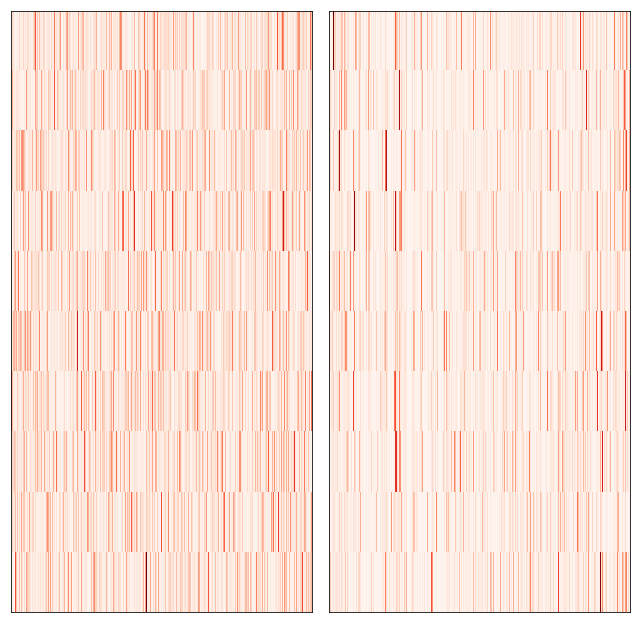

In [10]:
B1 = np.repeat(generator1.beta, 100, axis=0)
B2 = np.repeat(beta_post1, 100, axis=0)
B = [B1,B2] 
fig, axes = plt.subplots(1, 2, figsize=(9,9), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()


In [52]:
docs2 = generator2.sample(m=500)

In [58]:
model2 = LDA(10,500)

In [ ]:
phi_post2,gamma_post2,alpha_post2,beta_post2 = model2.fit_numba(docs2,max_iter=100)

step 0
finished E
finished M
step 1
finished E
finished M
step 2
finished E
finished M
step 3
finished E
finished M
step 4
finished E
finished M
step 5
finished E
finished M
step 6
finished E
finished M
step 7
finished E
finished M
step 8
finished E
finished M
step 9
finished E
finished M
step 10
finished E
finished M
step 11
finished E
finished M
step 12
finished E
finished M
step 13
finished E
finished M
step 14
finished E
finished M
step 15
finished E
finished M
step 16
finished E
finished M
step 17
finished E
finished M
step 18
finished E
finished M
step 19
finished E
finished M
step 20
finished E
finished M
step 21
finished E
finished M
step 22
finished E
finished M
step 23
finished E
finished M
step 24
finished E
finished M
step 25
finished E
finished M
step 26
finished E
finished M
step 27
finished E
finished M
step 28
finished E
finished M
step 29
finished E
finished M
step 30


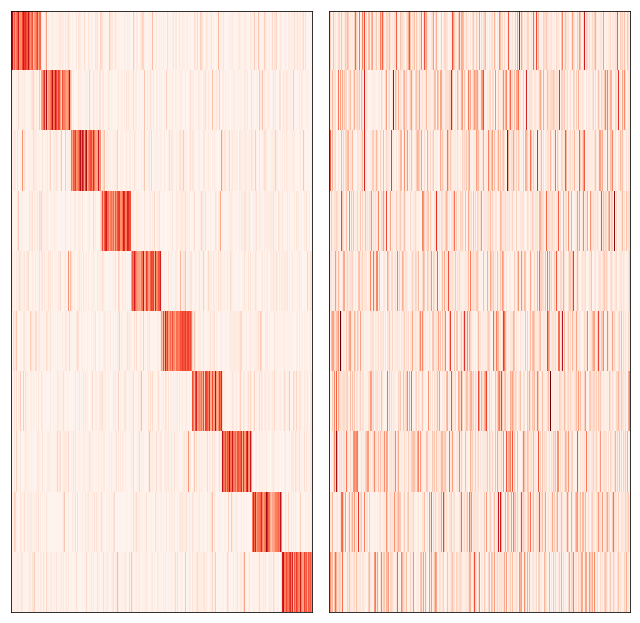

In [60]:
B1 = np.repeat(generator2.beta, 100, axis=0)
B2 = np.repeat(beta_post2, 100, axis=0)
B = [B1,B2] 
fig, axes = plt.subplots(1, 2, figsize=(9,9), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()

In [53]:
train = np.array([doc.sum(axis=0) for doc in docs2])

In [40]:
from sklearn.decomposition import LatentDirichletAllocation


In [54]:
lda = LatentDirichletAllocation(n_topics=10,
                                learning_offset=50.,
                                random_state=0)

In [57]:
%%time
lda.fit(train)

c:\users\xas_x\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Wall time: 1.89 s


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=10, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [47]:
lda.components_

array([[ 4.5336936 ,  4.11574101,  9.38497532, ...,  6.15994985,
         0.10003481,  6.92309407],
       [ 0.10007197,  1.86818149, 10.02010795, ...,  1.02741201,
         0.10000402, 15.67653393],
       [ 1.62130494,  0.10001962, 14.44416637, ...,  0.87774789,
         0.10003502,  3.08651314],
       ...,
       [ 3.30086531,  8.78377653,  5.94658074, ..., 23.42321789,
         5.47179237,  1.90095984],
       [ 4.17588842,  0.10000917,  4.35389612, ...,  0.10002864,
         0.10002818,  0.10000208],
       [ 0.65568906,  2.76485721, 36.85855102, ...,  8.19547023,
         1.27143385, 31.50242606]])

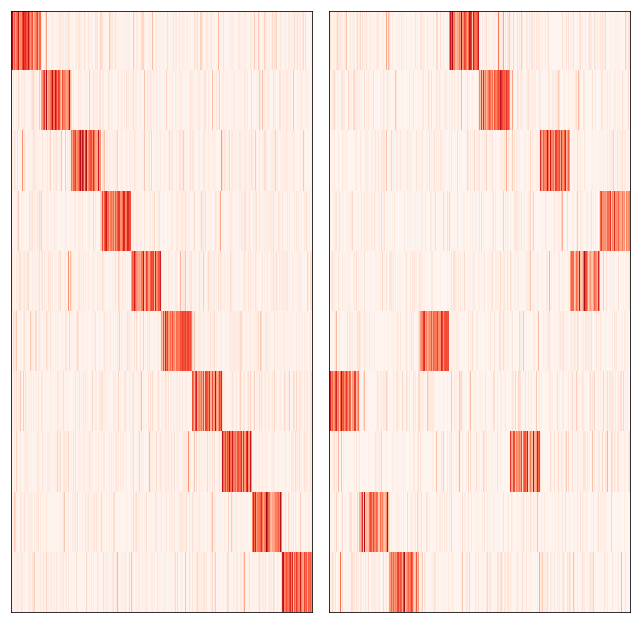

In [56]:
B1 = np.repeat(generator2.beta, 100, axis=0)
B2 = np.repeat(lda.components_, 100, axis=0)
B = [B1,B2] 
fig, axes = plt.subplots(1, 2, figsize=(9,9), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()